In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# better looking plots
sns.set(color_codes=True)

In [2]:
# package versions

print('pandas version:', pd.__version__)
print('numpy version:', np.__version__)

pandas version: 1.5.3
numpy version: 1.23.5


<br>
<br>
<br>

### Data Collection

In [3]:
# loading features
X = pd.read_csv("../Training/X_train.csv")
X.head()

,Unique_ID,C1,C2,C3,C4,C5,C6,C7,C8,N1,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,Candidate_5926,1,0,11,31,0,False,0,True,23.75,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,Candidate_48134,1,4,2,66,2,False,1,True,11.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,Candidate_51717,1,0,19,2,0,False,0,True,29.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,Candidate_26401,1,1,16,47,1,False,4,True,17.99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,Candidate_34872,1,1,13,1,1,True,6,True,27.50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [4]:
# loading target
y = pd.read_csv("../Training/y_train.csv")
y.head()

,Unique_ID,Dependent_Variable
0,Candidate_5926,1
1,Candidate_48134,0
2,Candidate_51717,1
3,Candidate_26401,0
4,Candidate_34872,0


In [5]:
# checking shape
print(X.shape)
print(y.shape)

(33050, 44)
(33050, 2)


In [6]:
# checking for duplicate values
X.duplicated().value_counts()

False    33050
dtype: int64

In [7]:
# checking for duplicate values
y.duplicated().value_counts()

False    33050
dtype: int64

In [8]:
# verifying index
(X['Unique_ID'] == y['Unique_ID']).value_counts()

True    33050
Name: Unique_ID, dtype: int64

<br>
<br>
<br>

### Target

In [9]:
# target variable
target = y.Dependent_Variable
target.head()

0    1
1    0
2    1
3    0
4    0
Name: Dependent_Variable, dtype: int64

In [10]:
# checking for null values
target.isna().any()

False

In [11]:
# distribution
target_counts = target.value_counts()
target_counts

0    22844
1    10206
Name: Dependent_Variable, dtype: int64

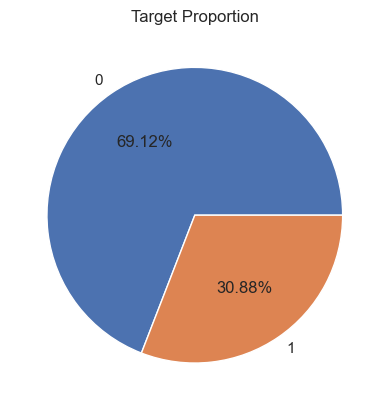

In [12]:
# proportion pie plot

plt.pie(target_counts.values, labels=target_counts.index, autopct='%0.2f%%')
plt.title('Target Proportion')
plt.show()

<br>
<br>
<br>

### Categorical Data

In [13]:
# extracting categorical data
cat_data = X.iloc[:, 1:9]
cat_data.head()

,C1,C2,C3,C4,C5,C6,C7,C8
0,1,0,11,31,0,False,0,True
1,1,4,2,66,2,False,1,True
2,1,0,19,2,0,False,0,True
3,1,1,16,47,1,False,4,True
4,1,1,13,1,1,True,6,True


In [14]:
# checking for missing values
cat_data.isna().sum()

C1    0
C2    0
C3    0
C4    0
C5    0
C6    0
C7    0
C8    0
dtype: int64

In [15]:
# getting unique values
cat_data.apply(lambda x: x.nunique())

C1     3
C2    21
C3    52
C4    68
C5     8
C6     2
C7     8
C8     2
dtype: int64

note:
- C2, C3, C4 features have high cardinality 
- C5, C7 features have medium cardinality
- C6, C8 are boolean features

action:
- reduce cadinality by keeping top n categories and replacing remaining categories by `other`
- convert boolean features to integer -> 1, 0

<br>
<br>

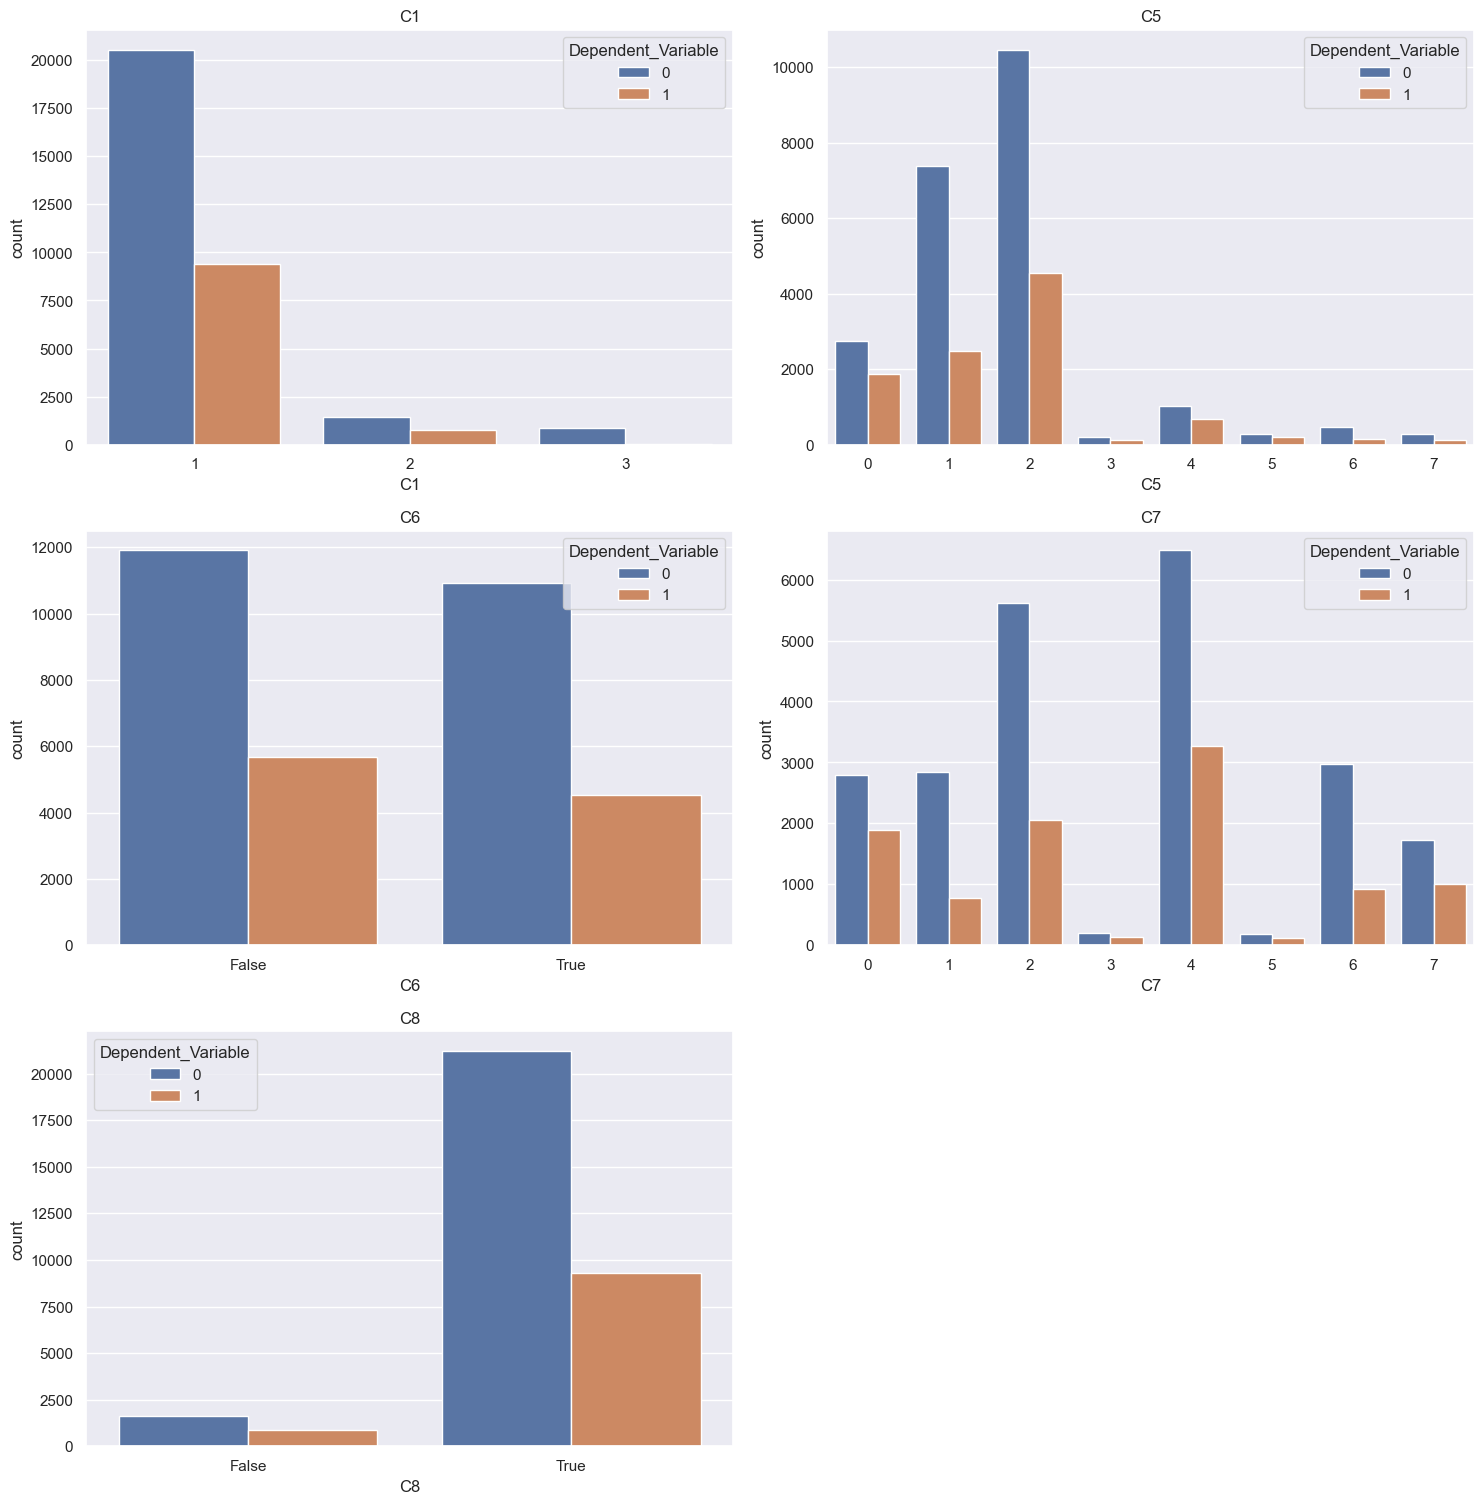

In [51]:
# feature distribution with respect to target

features = ['C1', 'C5', 'C6', 'C7', 'C8']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.tight_layout()
    sns.countplot(x=cat_data[feature], hue=target)
    plt.title(feature)

plt.show()

note:
- All the above plots have similar behaviour
- All have around 2:1 ratio for 0 & 1 outcomes

<br>
<br>

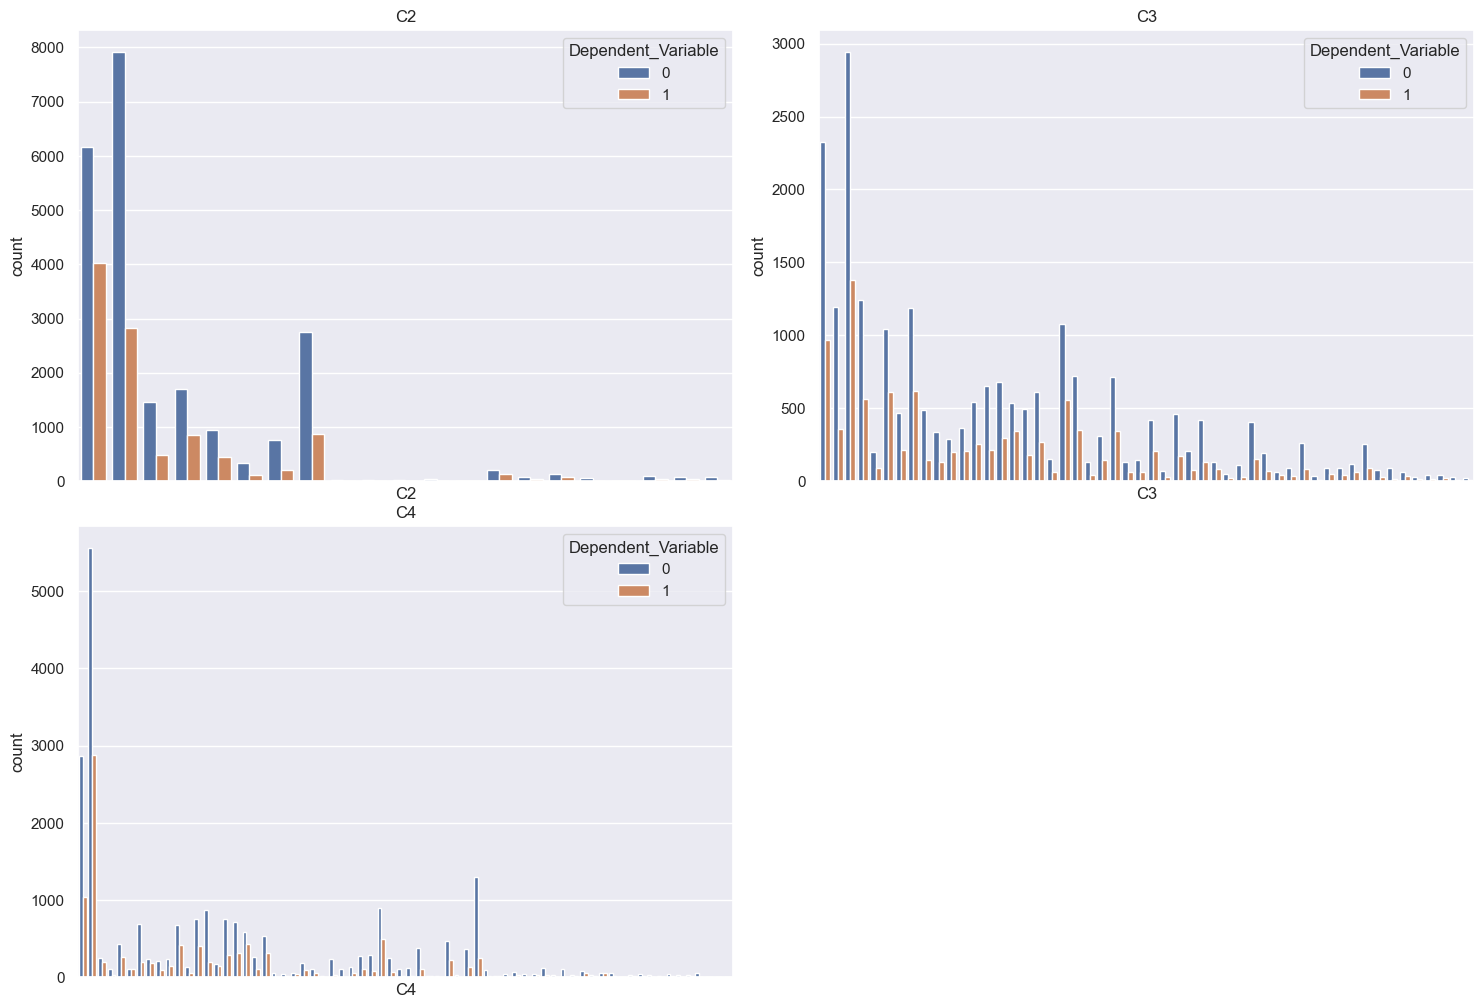

In [55]:
# feature distribution of high cardinal features

features = ['C2', 'C3', 'C4']

plt.figure(figsize=(15, 15))

for i, feature in enumerate(features):
    plt.subplot(3, 2, i+1)
    plt.tight_layout()
    sns.countplot(x=cat_data[feature], hue=target)
    plt.xticks([])
    plt.title(feature)

plt.show()

note:
- Similar behaviour for dependent variable as observed previously
- In `C2` there are 7 features with higher count than other
- In `C3` the count is gradually decreasing
- In `C4` there are 3 features with considerably higher count

<br>
<br>
<br>

### Numerical Features

In [13]:
# extracting numerical features
num_data = X.iloc[:, 9:]
num_data.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N26,N27,N28,N29,N30,N31,N32,N33,N34,N35
0,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.0,113.39,12.0
1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160.0,262.10,17.0
2,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,50.29,18.0
3,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,126.52,27.0
4,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,205.47,21.0


In [14]:
# missing value percentage

missing_values = num_data.isna().sum() / len(num_data)
missing_values.sort_values(ascending=False)[:10]

N32    0.811800
N27    0.810257
N26    0.810257
N25    0.810257
N31    0.810257
N30    0.810257
N29    0.810257
N28    0.810257
N12    0.139607
N2     0.139546
dtype: float64

In [15]:
# features with more than 80% missing values

high_missing_features = missing_values.sort_values(ascending=False)[:8].index
high_missing_features

Index(['N32', 'N27', 'N26', 'N25', 'N31', 'N30', 'N29', 'N28'], dtype='object')

In [16]:
# droping features with high missing values

num_data.drop(high_missing_features, axis=1, inplace=True)
num_data.head()

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
0,23.75,NaN,2.5,NaN,NaN,2.595,10.0,0,0,2.0,...,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,113.39,12.0
1,11.05,22.0,3.7,16.0,12.0,3.795,19.0,4,72,0.0,...,0.06,25856.0,17.0,0.88,1.0,40.000,10833.333330,160.0,262.10,17.0
2,29.00,NaN,2.4,NaN,NaN,2.495,17.0,2,15,7.0,...,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,50.29,18.0
3,17.99,1.0,3.5,4.0,4.0,3.595,6.0,5,190,0.0,...,0.89,1006.0,6.0,1.00,0.0,26.000,2413.666667,70.0,126.52,27.0
4,27.50,206.0,3.8,11.0,11.0,3.895,31.0,10,1504,0.0,...,0.97,3398.0,31.0,0.96,0.0,44.000,7666.666667,100.0,205.47,21.0


Number of columns reduced from 35 to 27

<br>
<br>

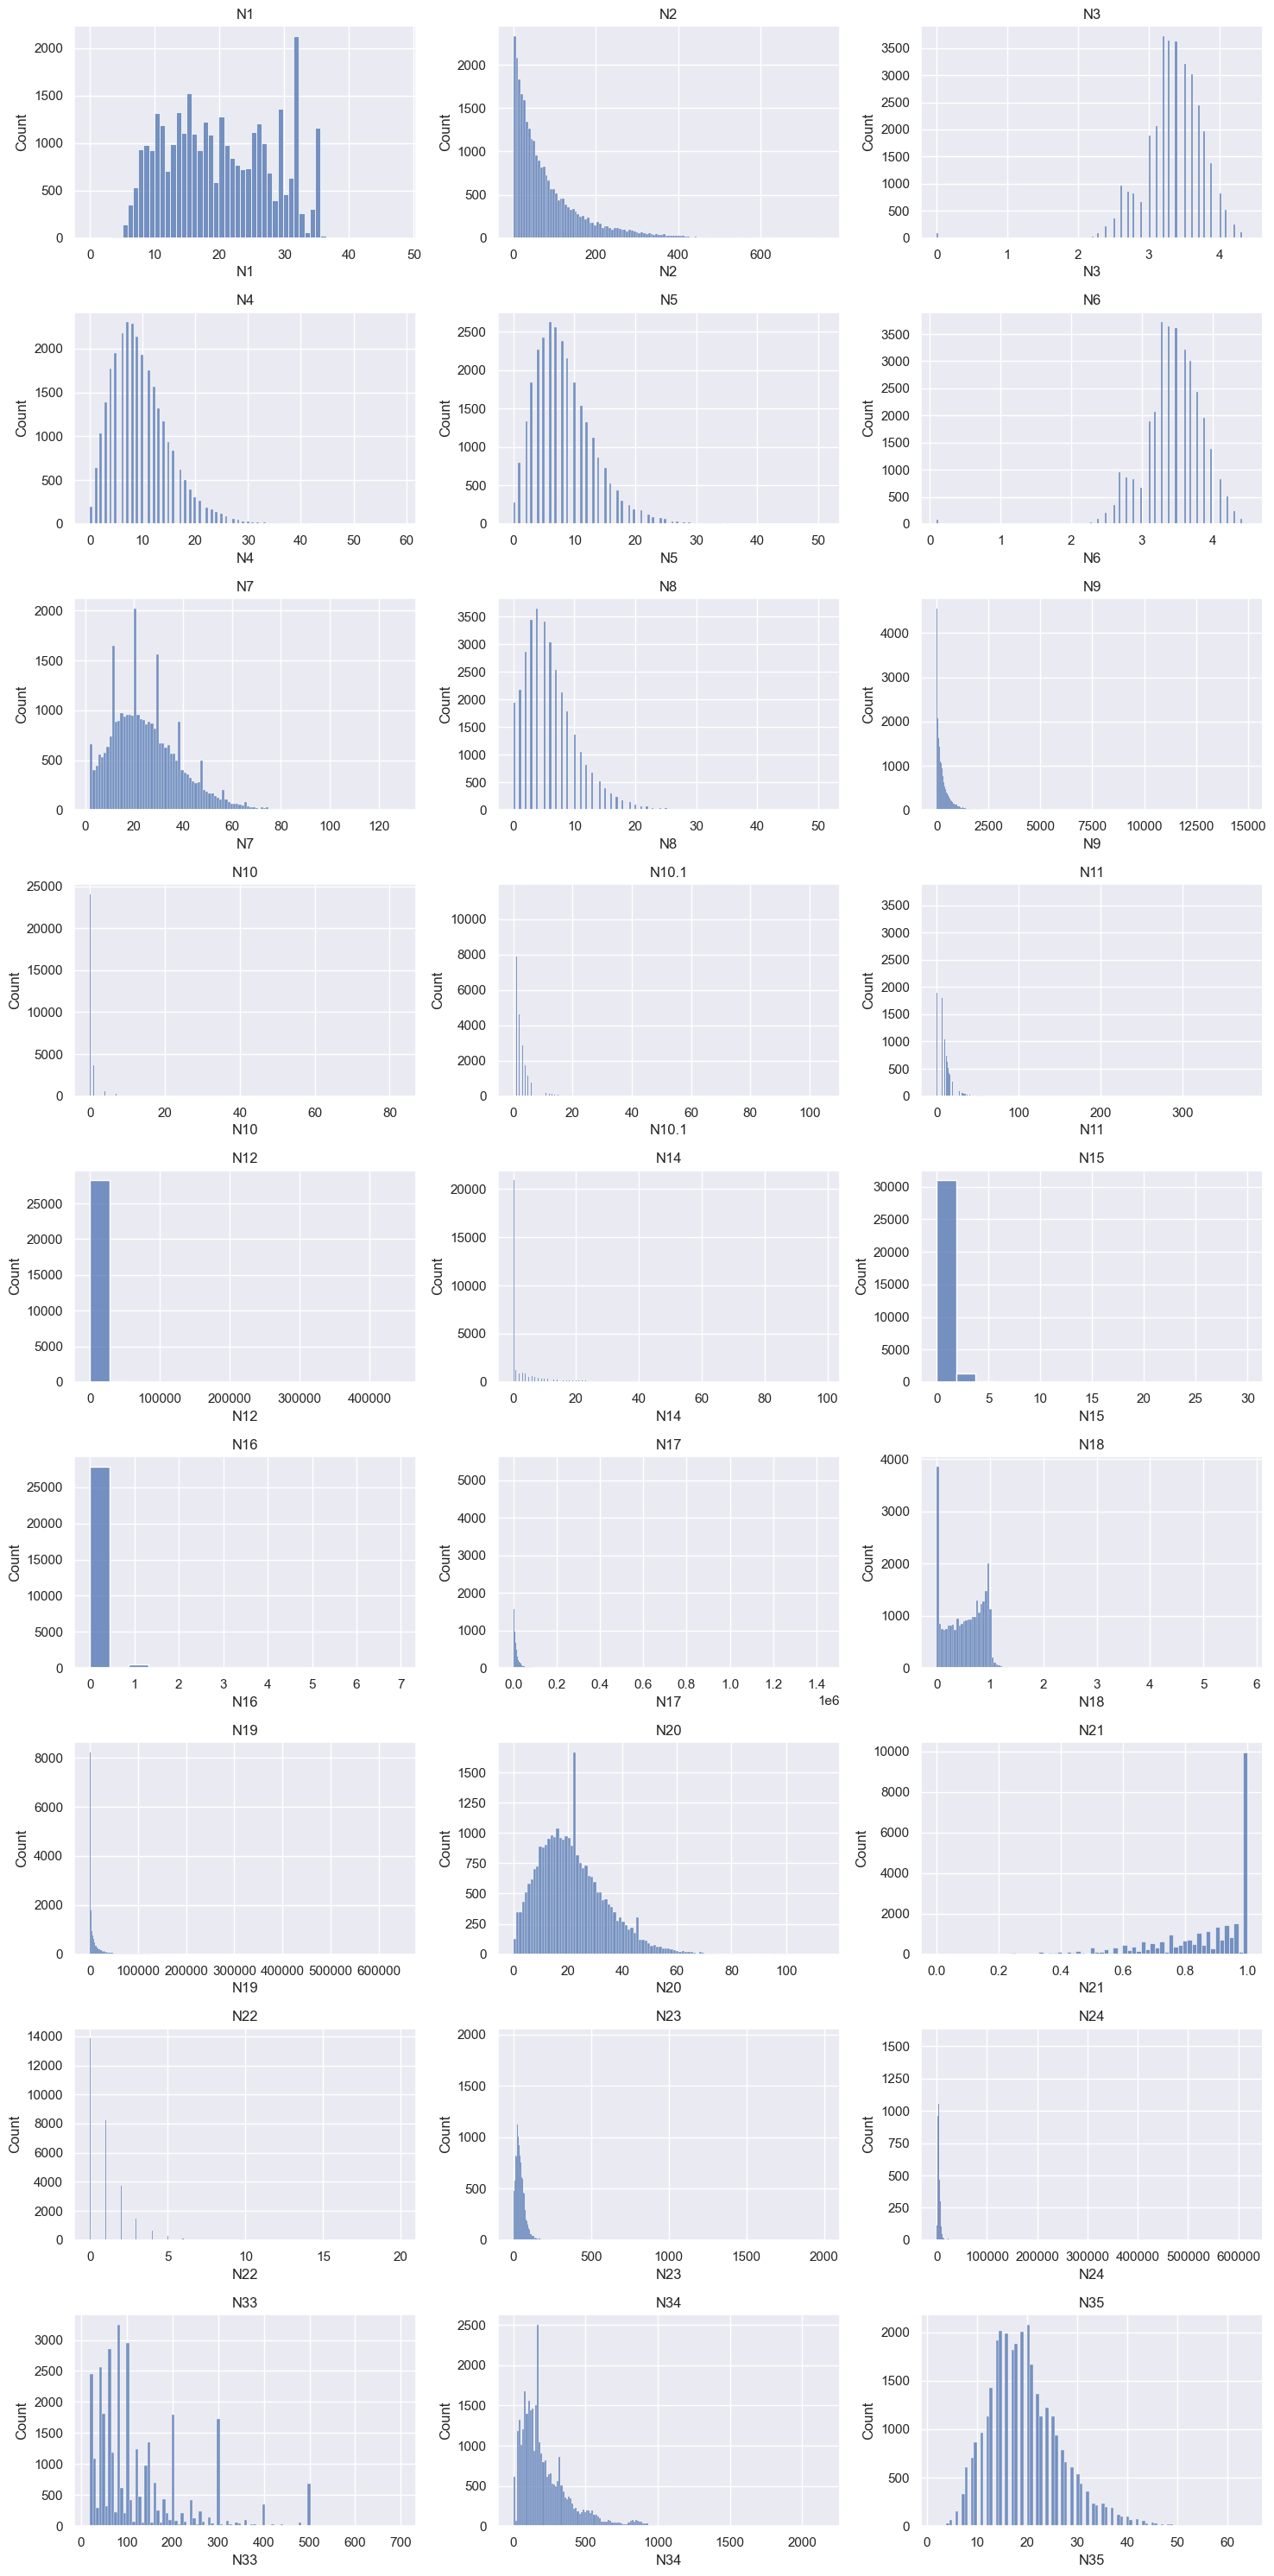

In [68]:
# plotting histogram

features = num_data.columns

plt.figure(figsize=(15, 30))

for i, feature in enumerate(features):
    plt.subplot(9, 3, i+1)
    plt.tight_layout()
    sns.histplot(x=num_data[feature])
    plt.title(feature)

plt.show()

We can see some histograms have exactly same distribution 

Let's look at correlation matrix to see if any features are correlated

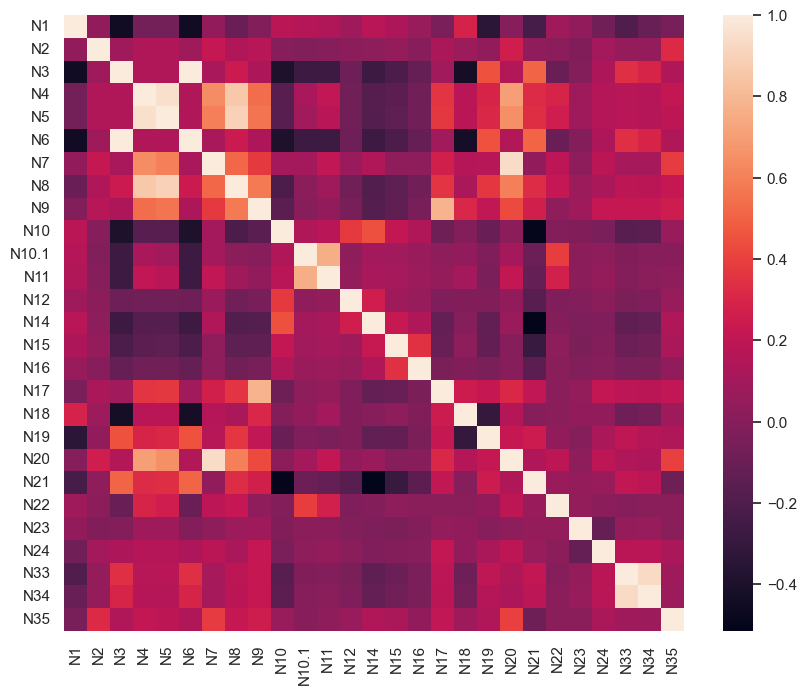

In [80]:
# correlation heat map

num_data_corr = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(num_data_corr)
plt.show()

In [105]:
# correlation with greater than 0.9
num_data_corr[(num_data_corr > 0.9) & (num_data_corr != 1.0)].dropna(how='all')

,N1,N2,N3,N4,N5,N6,N7,N8,N9,N10,...,N18,N19,N20,N21,N22,N23,N24,N33,N34,N35
N3,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N4,NaN,NaN,NaN,NaN,0.955797,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N5,NaN,NaN,NaN,0.955797,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N6,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.939347,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N20,NaN,NaN,NaN,NaN,NaN,NaN,0.939347,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
N33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930203,NaN
N34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.930203,NaN,NaN


In [ ]:
# high positive correlation

# N3 - N6
# N4 - N5
# N7 - N20
# N33 - N34

In [17]:
# dropping second feature from high correlation pair

num_data.drop(['N6', 'N5', 'N20', 'N34'], axis=1, inplace=True)

In [18]:
num_data.head()

,N1,N2,N3,N4,N7,N8,N9,N10,N10.1,N11,...,N16,N17,N18,N19,N21,N22,N23,N24,N33,N35
0,23.75,NaN,2.5,NaN,10.0,0,0,2.0,14.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27.816,1750.000000,58.0,12.0
1,11.05,22.0,3.7,16.0,19.0,4,72,0.0,5.0,9.0,...,0.0,1944.0,0.06,25856.0,0.88,1.0,40.000,10833.333330,160.0,17.0
2,29.00,NaN,2.4,NaN,17.0,2,15,7.0,3.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,20.000,6250.000000,24.0,18.0
3,17.99,1.0,3.5,4.0,6.0,5,190,0.0,0.0,0.0,...,0.0,8244.0,0.89,1006.0,1.00,0.0,26.000,2413.666667,70.0,27.0
4,27.50,206.0,3.8,11.0,31.0,10,1504,0.0,1.0,4.0,...,0.0,57532.0,0.97,3398.0,0.96,0.0,44.000,7666.666667,100.0,21.0


Number of features reduced from 27 -> 23

<br>
<br>

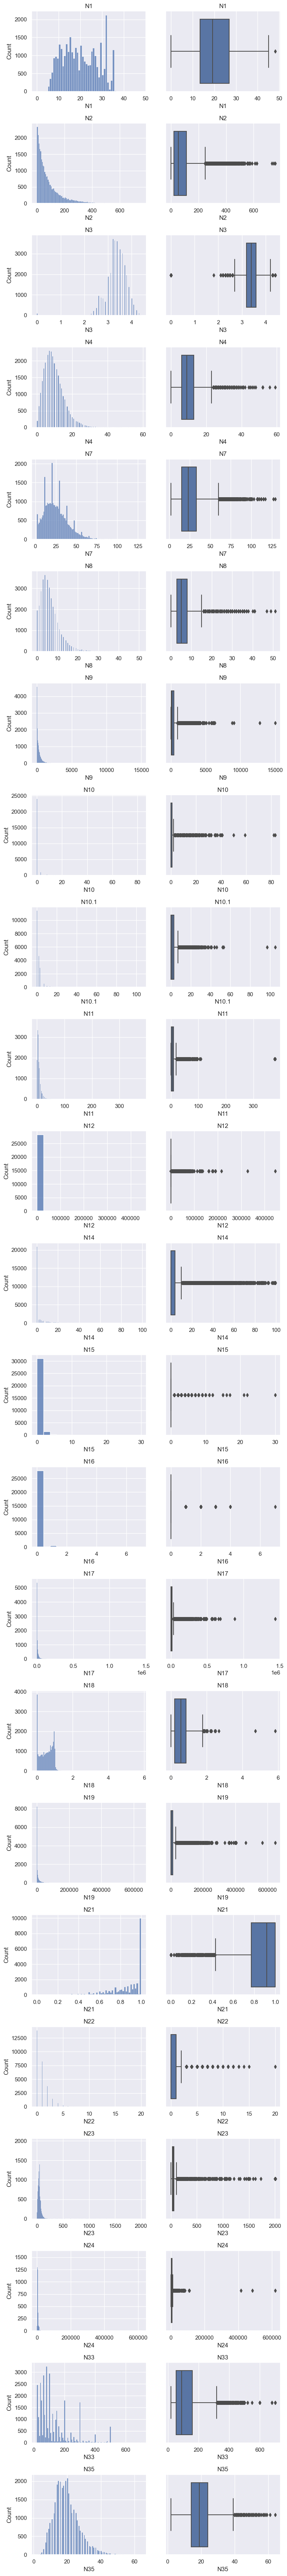

In [20]:
# plotting histogram and boxplot

features = num_data.columns


plt.figure(figsize=(8, 70))

for i, feature in enumerate(features):
    plt.subplot(23, 2, i*2+1)
    plt.tight_layout()
    sns.histplot(x=num_data[feature])
    plt.title(feature)

    plt.subplot(23, 2, i*2+2)
    plt.tight_layout()
    sns.boxplot(x=num_data[feature])
    plt.title(feature)

plt.show()

We can see there are outliers present in some of these features

Before we deal with these outliers, let's have a look<br>
at numerical features distribution with respect to target

<br>
<br>

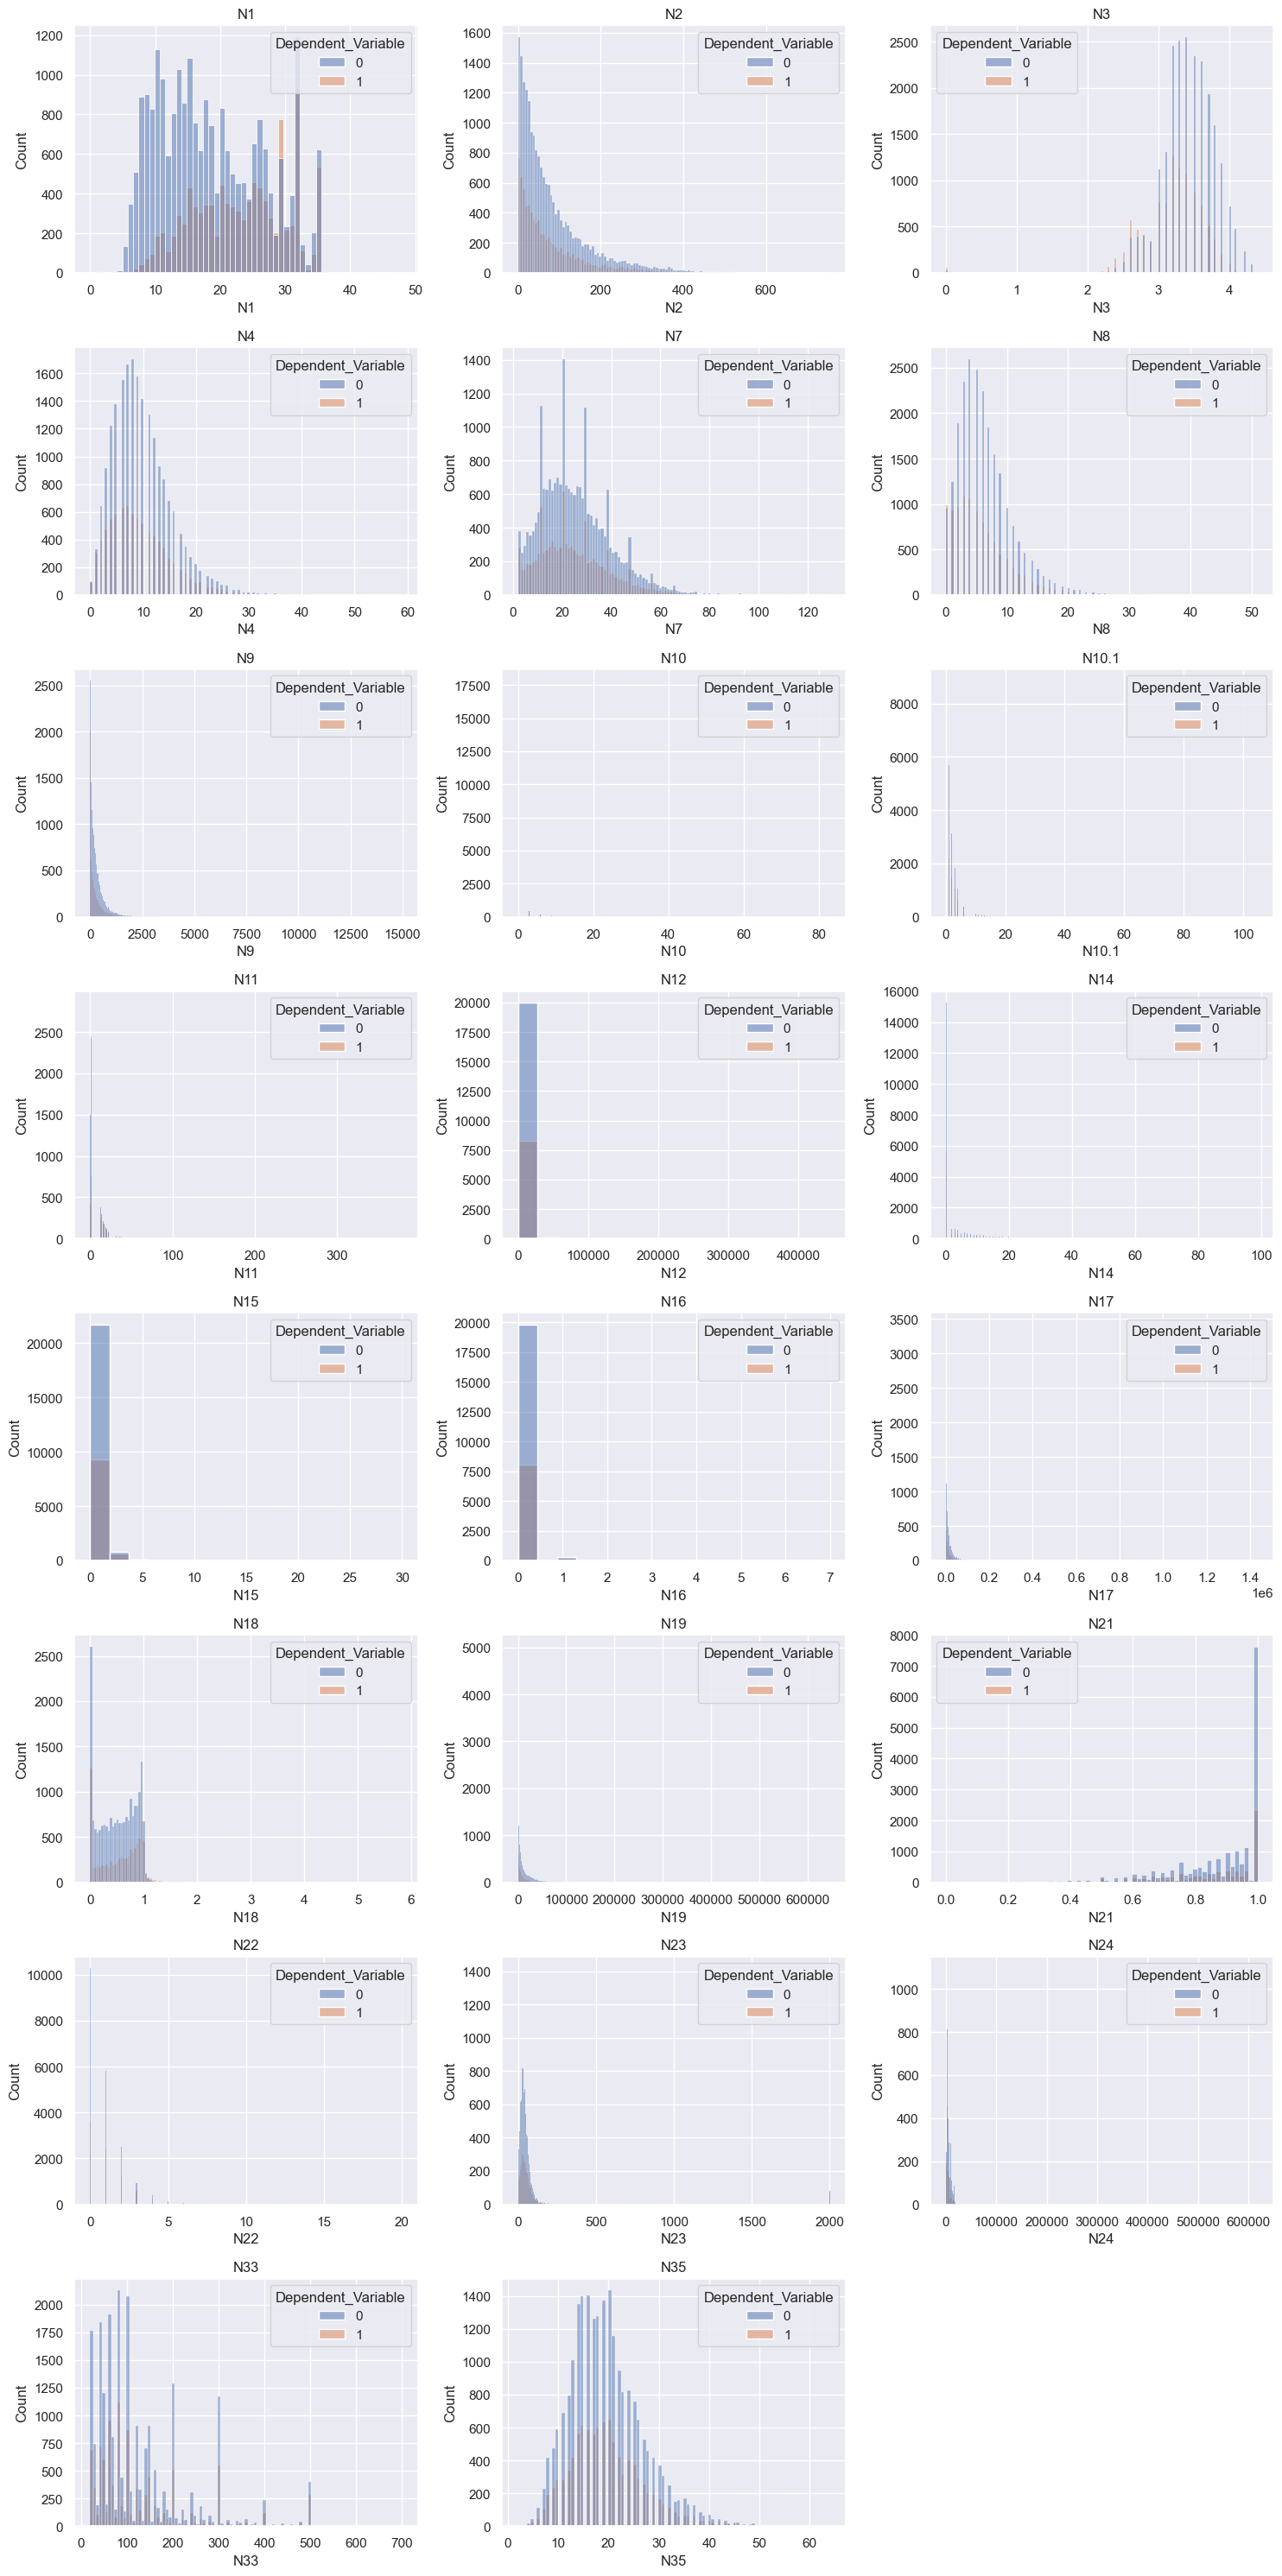

In [34]:
# plotting histogram wrt target

features = num_data.columns

plt.figure(figsize=(15, 30))

for i, feature in enumerate(features):
    plt.subplot(8, 3, i+1)
    plt.tight_layout()
    sns.histplot(x=num_data[feature], hue=target)
    plt.title(feature)

plt.show()

note:
- Both the target classes behaves more-or-less the same
- `N1` shows slightly different behaviour as it's value increases (this might be an important feature)

<br>
<br>

Now let's deal with the outliers<br>
<br>
Instead of caping or removing the outliers, we'll replace them with null values.<br>
So they can be imputed later. This will prevent data loss.

In [159]:
# outlier limit for each feature
# derived from below analysis

outlier_limit = {
    'N1': 45,
    'N2': 530,
    'N3': 4.3,
    'N4': 40,
    'N7': 95,
    'N8': 33,
    'N9': 45,
    'N10': 4500,
    'N10.1': 32,
    'N11': 80,
    'N12': 100_000,
    'N14': 100,
    'N15': 13,
    'N16': 2,
    'N17': 450_000,
    'N18': 1.8,
    'N19': 260_000,
    'N21': 1,
    'N22': 10,
    'N23': 2100,
    'N24': 50_000,
    'N33': 500,
    'N35': 54,
}

<br>

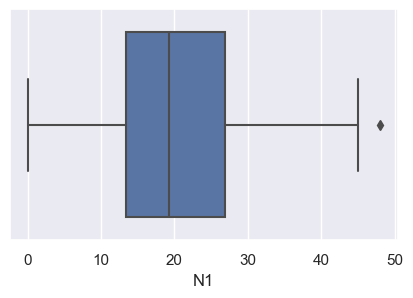

In [161]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N1)
plt.show()

In [27]:
(num_data.N1 > 45).sum()

1

<br>

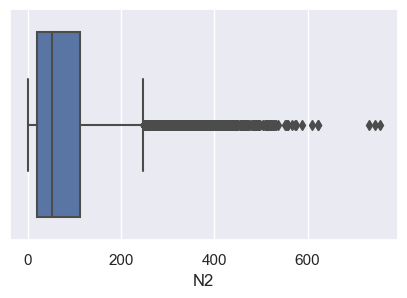

In [162]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N2)
plt.show()

In [35]:
(num_data.N2 > 530).sum()

16

<br>

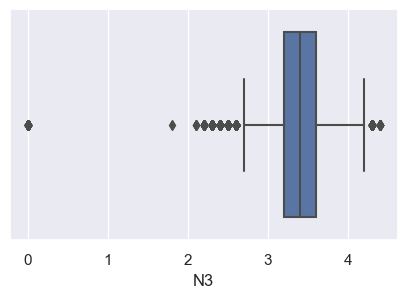

In [163]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N3)
plt.show()

In [41]:
(num_data.N3 > 4.3).sum()

13

<br>

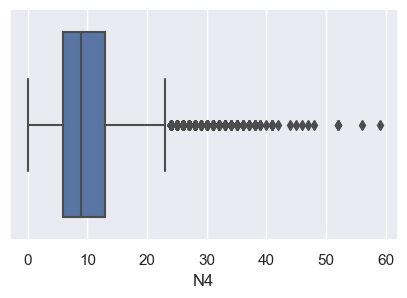

In [164]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N4)
plt.show()

In [53]:
(num_data.N4 > 40).sum()

17

<br>

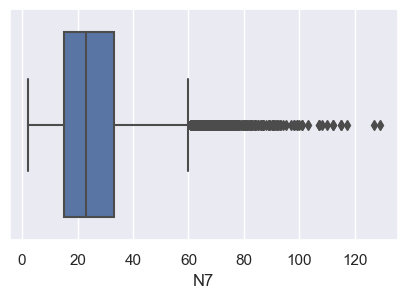

In [165]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N7)
plt.show()

In [59]:
(num_data.N7 > 95).sum()

20

<br>

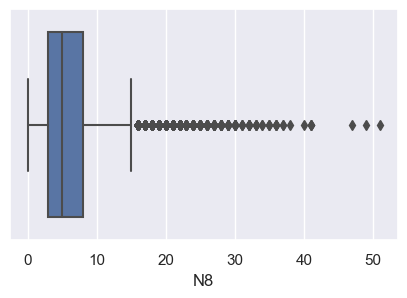

In [166]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N8)
plt.show()

In [64]:
(num_data.N8 > 33).sum()

19

<br>

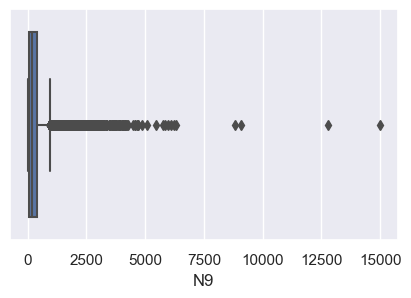

In [167]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N9)
plt.show()

In [68]:
(num_data.N9 > 4500).sum()

18

<br>

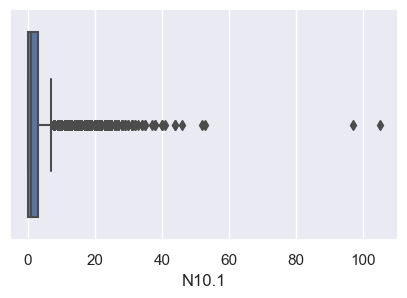

In [168]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data['N10.1'])
plt.show()

In [76]:
(num_data['N10.1'] > 32).sum()

18

<br>

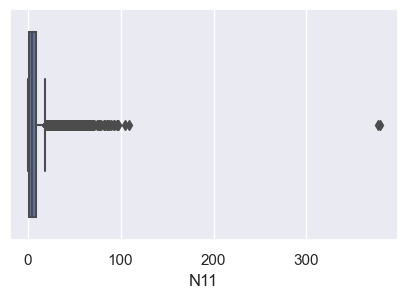

In [169]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N11)
plt.show()

In [80]:
(num_data.N11 > 80).sum()

19

<br>

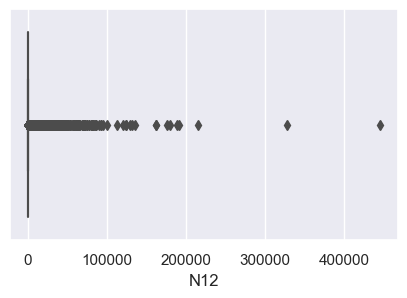

In [170]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N12)
plt.show()

In [84]:
(num_data.N12 > 100_000).sum()

16

<br>

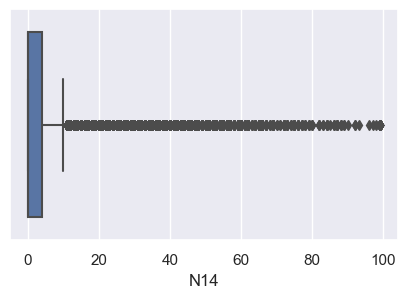

In [171]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N14)
plt.show()

In [88]:
(num_data.N14 > 100).sum()

0

<br>

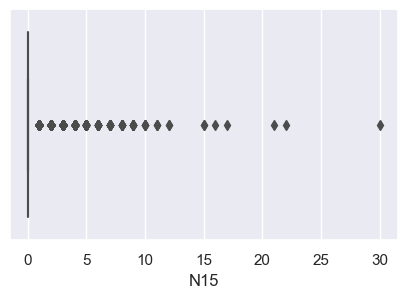

In [172]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N15)
plt.show()

In [98]:
(num_data.N15 > 13).sum()

7

<br>

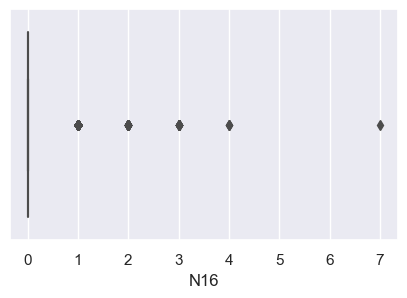

In [173]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N16)
plt.show()

In [105]:
(num_data.N16 > 2).sum()

17

<br>

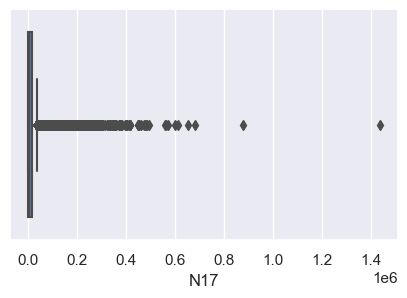

In [174]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N17)
plt.show()

In [111]:
(num_data.N17 > 450_000).sum()

18

<br>

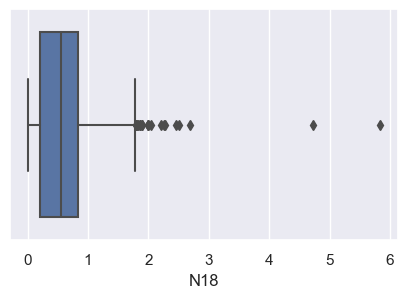

In [175]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N18)
plt.show()

In [117]:
(num_data.N18 > 1.8).sum()

19

<br>

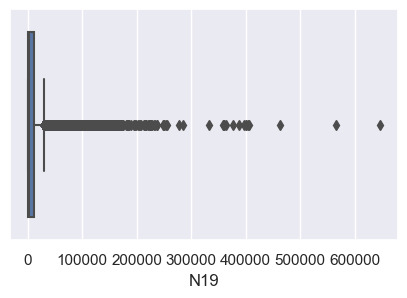

In [176]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N19)
plt.show()

In [123]:
(num_data.N19 > 260_000).sum()

17

<br>

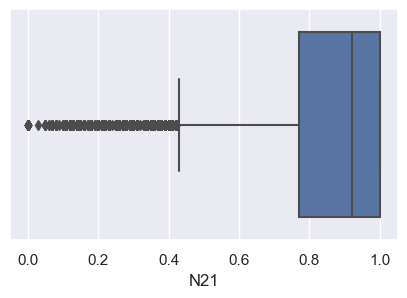

In [177]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N21)
plt.show()

In [125]:
(num_data.N21 > 1).sum()

0

<br>

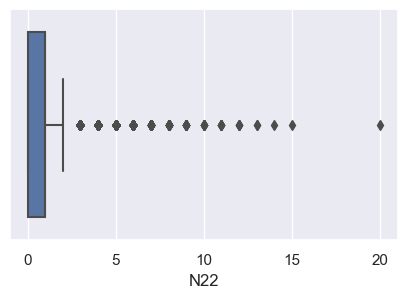

In [178]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N22)
plt.show()

In [131]:
(num_data.N22 > 10).sum()

15

<br>

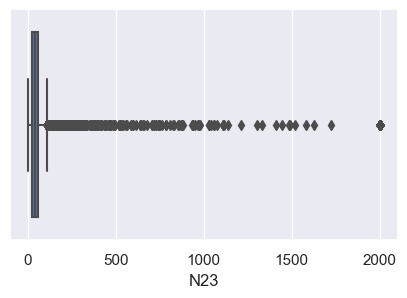

In [179]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N23)
plt.show()

In [137]:
(num_data.N23 > 2100).sum()

0

<br>

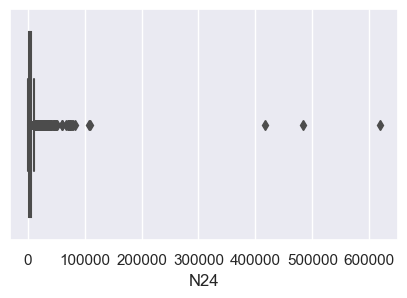

In [180]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N24)
plt.show()

In [143]:
(num_data.N24 > 50_000).sum()

19

<br>

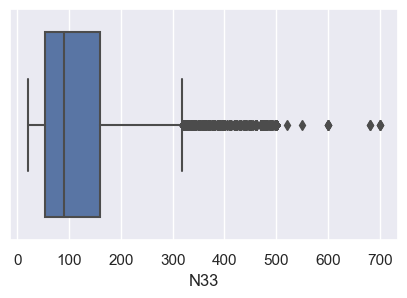

In [181]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N33)
plt.show()

In [151]:
(num_data.N33 > 500).sum()

11

<br>

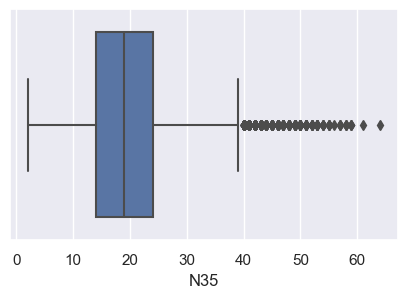

In [182]:
plt.figure(figsize=(5, 3))
sns.boxplot(x=num_data.N35)
plt.show()

In [158]:
(num_data.N35 > 54).sum()

16

<br>
<br>
<br>

There are also some features with skewed distribution.<br>
We can convert them using log transformation to have normal-like distribution.

In [183]:
skewed_features = [
    'N2',
    'N9',
    'N17',
    'N19',
]

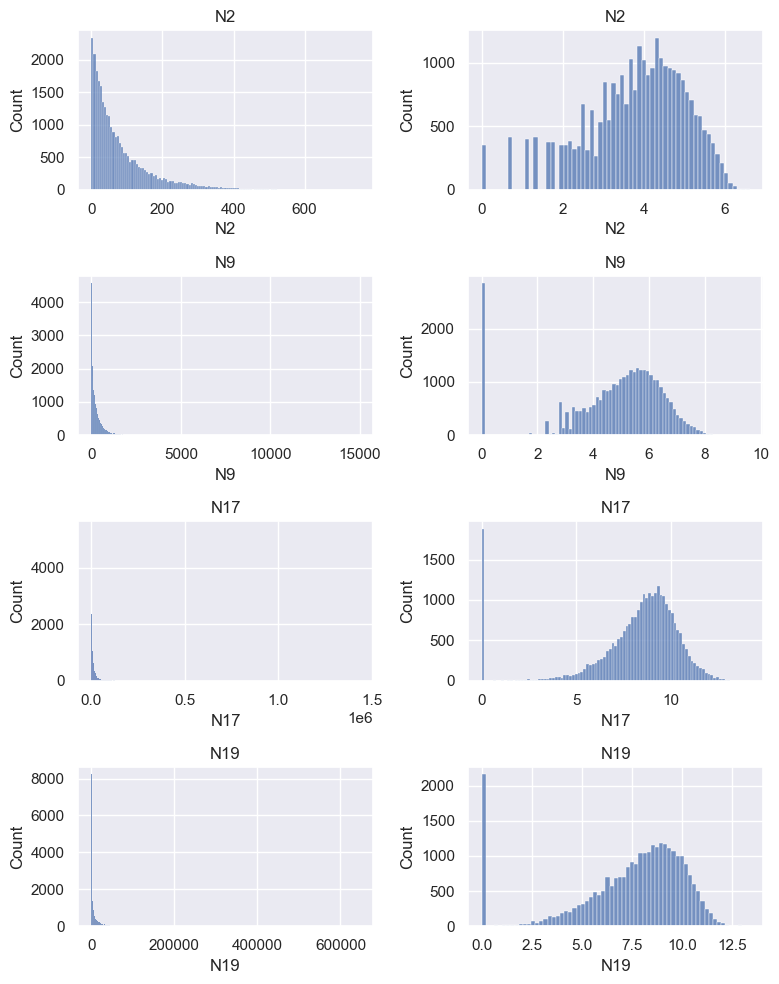

In [187]:
# plotting histogram

plt.figure(figsize=(8, 10))

for i, feature in enumerate(skewed_features):
    plt.subplot(4, 2, i*2+1)
    plt.tight_layout()
    sns.histplot(x=num_data[feature])
    plt.title(feature)

    plt.subplot(4, 2, i*2+2)
    plt.tight_layout()
    sns.histplot(x=np.log1p(num_data[feature]))
    plt.title(feature)

plt.show()

<br>